# ch.3 회귀 알고리즘과 모델 규제

## ch3.1 k-최근접 이웃 회귀

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 산점도 그리기 ( 데이터가 어떤 형태를 띠고 있는가? )

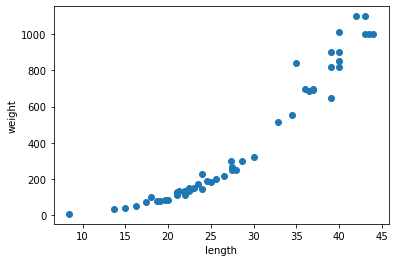

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 농어의 길이가 길어짐에 따라서 무게도 같이 늘어난다.

### 훈련세트와 테스트세트로 나누기

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [8]:
# 2차원 배열로 바꾸기
print(train_input.shape)
print(test_input.shape)
# 1차원 형태

(42,)
(14,)


In [10]:
# 1-dimensional -> 2-dimensional
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)
# 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미

(42, 1) (14, 1)


### 결정계수

In [11]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target) # k-최근접 이웃 회귀모델을 훈련

KNeighborsRegressor()

In [12]:
print(knr.score(test_input, test_target))
# 결정계수 도출. 예측이 타깃에 가까워지면 1에 가까운 값

0.992809406101064


### 타깃과 예측한 값 사이의 차이 구해보기 ( 어느 정도 예측이 벗어났는지 예상하기 좋음 )

In [13]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)
# 19g 정도 타깃값과 다르단ㄴ 것을 알 수 있다.

19.157142857142862


### 과대적합 vs 과소적합

In [16]:
print(knr.score(train_input, train_target))
# 과대적합 : 훈련 세트에서 점수가 좋았는데 테스트 세트에서 점수가 나쁠때
# 과소적합 : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수 둘다 낮을 때
# 다음 모델은 테스트 세트의 점수가 더 높기 때문에 과소적합

0.9698823289099254


In [18]:
# 모델을 복잡하게 만든다.
# 이웃의 개수 k를 줄이면 된다.(기본값 5)
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [19]:
print(knr.score(test_input, test_target))

0.9746459963987609


## ch3.2 선형 회귀

In [20]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [22]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [23]:
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [24]:
# 길이 50cm인 농어 무게 예측하기
print(knr.predict([[50]]))

[1033.33333333]


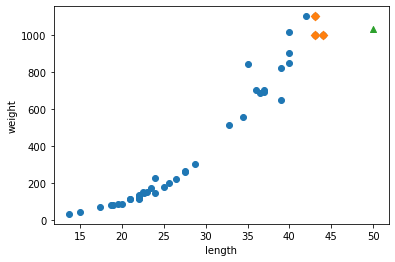

In [26]:
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50,1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# k-최근접 이웃 알고리즘은 50cm인 농어의 근처인 45cm 근방의 샘플들의 무게를 평균한다.

In [27]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [28]:
# 길이가 100cm인 농어도 똑같이 예측한다.
print(knr.predict([[100]]))

[1033.33333333]


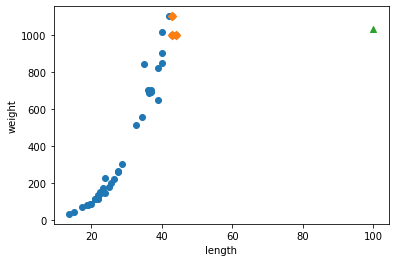

In [29]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100,1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형회귀

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [32]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.018644953547


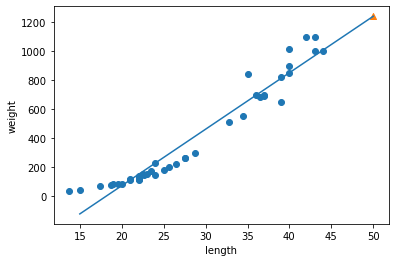

In [34]:
# 농어 길이 15~50까지 직선으로 그리기
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50,1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313562


### 다항 회귀

In [37]:
# 선형 회귀는 농어의 무게가 0g 이하로 내려가는 경우가 발생하지만, 현실에서는 있을 수 없는 일
# 2차 방정식의 그래프 그리기
# 넘파이 이용
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [38]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [39]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278293


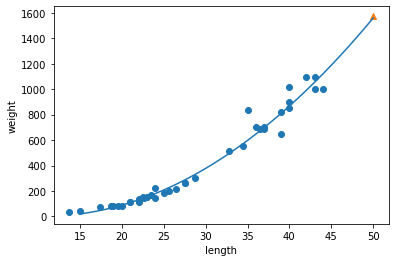

In [42]:
point = np.arange(15,51)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


## ch3.3 특성공학과 규제

### 데이터 준비

In [45]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [46]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [52]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

### 사이킷런의 변환기

In [49]:
# 변환기 : 특성을 만들거나 전처리하기 위한 클래스
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [50]:
poly = PolynomialFeatures(include_bias = False) # 절편을 위한 항 제거
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [53]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [54]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [55]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

In [56]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [57]:
print(lr.score(test_poly, test_target))

0.9714559911594223


In [61]:
# PolynomialFeatures 클래스의 degree 매개변수를 사용해서 3,4제곱 항을 넣는다
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [62]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999957028


In [63]:
print(lr.score(test_poly, test_target))
# 특성의 개수를 늘리면 선형모델은 아주 강력해지지만 훈련세트에 과대적합되므로 테스트세트에서는 점수가 형편없어짐

-144.40508211356158


## 규제

In [65]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀

In [66]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [67]:
print(ridge.score(test_scaled, test_target))

0.9790693977615393


모델 객체를 만들 때 alpha 매개변수로 규제의 강도 조절
alpha 값이 크면 규제강도가 세지기 때문에 계수값을 줄이고 조금 더 과소적합되도록 유도
alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성 커짐

In [68]:
# alpha값에 대한 결정계수 그래프를 그리면 적절한 alpha값을 찾을 수 있음
train_score = []
test_score = []
alpha_list =[ 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

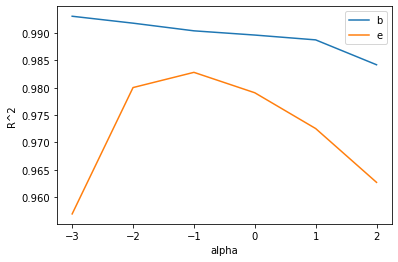

In [72]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend('best')
plt.show()
# -1 일때 즉, alpha = 0.1 일때로 최종모델

In [73]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386882


## 라쏘 회귀

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [76]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [77]:
train_score = []
test_score = []
alpht_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792087, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345402686, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


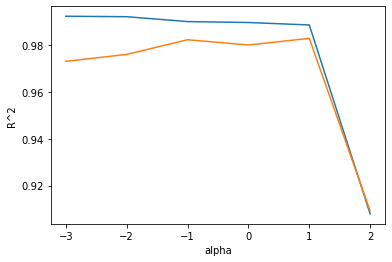

In [78]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 최적의 모델 1일 떄 즉, 10일 때

In [79]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [80]:
# 라쏘 모델의 계수는 coef_속성에 있음
print(np.sum(lasso.coef_ == 0))

40


55개의 특성을 모델에 주입했지만 라쏘모델에서 사용한 특성은 15개
라쏘모델을 유용한 특성을 골라내는 용도로 사용할 수 있음!